<a href="https://colab.research.google.com/github/jiw3026/analy/blob/main/SVM_%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/Shareddrives/신빅해-신박해커톤/preprocessing.csv')
df_축산업 = pd.read_csv('/content/drive/Shareddrives/신빅해-신박해커톤/data_045.csv', encoding='euc-kr')

In [ ]:
df.drop(columns=['Unnamed: 0'],inplace = True)

In [ ]:
df.head()

,P1,P3,P4,P5,P6,B165,B166,C1,E1,E2,...,제조업,자동차,자동차유지비,연료/가스비,수제용품점,기타,전체금액,자전거,age,bank
0,0,1,1,0,0,0,0,210,0,0,...,0,0,70000,76000,0,0,4350000,0,20,0
1,0,1,0,0,0,0,0,40,0,0,...,0,0,0,0,0,1000,580000,0,50,0
2,0,1,1,0,0,0,0,50,0,1101101111,...,0,0,0,129000,0,0,1950000,0,40,0
3,1,1,1,0,0,0,0,50,0,0,...,0,0,0,0,0,0,43000000,0,60,0
4,0,0,1,0,0,0,0,40,0,111111111111,...,0,0,20000,0,0,0,4910000,0,30,1


In [ ]:
df['축산업'] = df_축산업['B25']

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from matplotlib.ticker import StrMethodFormatter,FormatStrFormatter

In [ ]:
import numpy as np
df['숙박업'] = np.log1p(df['숙박업'])
df['여행업'] = np.log1p(df['여행업'])
df['세금'] = np.log1p(df['세금'])
df['잡화및쇼핑'] = np.log1p(df['잡화및쇼핑'])
df['농수산물'] = np.log1p(df['농수산물'])
df['결제대행'] = np.log1p(df['결제대행'])
df['요식업'] = np.log1p(df['요식업'])
df['가구/전자제품'] = np.log1p(df['가구/전자제품'])
df['중고품 판매점'] = np.log1p(df['중고품 판매점'])
df['사무/통신기기'] = np.log1p(df['사무/통신기기'])
df['통신요금'] = np.log1p(df['통신요금'])
df['의류'] = np.log1p(df['의류'])
df['귀금속/악세서리'] = np.log1p(df['귀금속/악세서리'])
df['취미/문화'] = np.log1p(df['취미/문화'])
df['학업'] = np.log1p(df['학업'])
df['보험'] = np.log1p(df['보험'])
df['장례업'] = np.log1p(df['장례업'])
df['법률업'] = np.log1p(df['법률업'])
df['오락'] = np.log1p(df['오락'])
df['의료'] = np.log1p(df['의료'])
df['제조업'] = np.log1p(df['제조업'])
df['자동차'] = np.log1p(df['자동차'])
df['축산업'] = np.log1p(df['축산업'])
df['자동차유지비'] = np.log1p(df['자동차유지비'])
df['연료/가스비'] = np.log1p(df['연료/가스비'])
df['수제용품점'] = np.log1p(df['수제용품점'])
df['기타'] = np.log1p(df['기타'])
df['자전거'] = np.log1p(df['자전거'])

In [ ]:
df2 = df.drop(columns=['P5','P6','B165','B166','E1','E2','E3','E4','E5','E6'])

In [ ]:
df2.drop(columns=['오락','법률업','장례업','귀금속/악세서리','예식업', '학업' ,'세금', '숙박업', '기타', '여행업', '결제대행', '요식업', '가구/전자제품', '통신요금', '잡화및쇼핑', '사무/통신기기', '취미/문화', '의류', '보험', '의료', '제조업'], inplace=True)
df2

,P1,P3,P4,C1,농수산물,중고품 판매점,자동차,자동차유지비,연료/가스비,수제용품점,전체금액,자전거,age,bank,축산업
0,0,1,1,210,0.000000,0.0,0.0,11.156265,11.238502,0.0,4350000,0.0,20,0,0.0
1,0,1,0,40,0.000000,0.0,0.0,0.000000,0.000000,0.0,580000,0.0,50,0,0.0
2,0,1,1,50,0.000000,0.0,0.0,0.000000,11.767575,0.0,1950000,0.0,40,0,0.0
3,1,1,1,50,0.000000,0.0,0.0,0.000000,0.000000,0.0,43000000,0.0,60,0,0.0
4,0,0,1,40,0.000000,0.0,0.0,9.903538,0.000000,0.0,4910000,0.0,30,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473224,1,0,1,30,0.000000,0.0,0.0,0.000000,0.000000,0.0,650000,0.0,40,1,0.0
473225,0,1,1,50,0.000000,0.0,0.0,0.000000,0.000000,0.0,4790000,0.0,20,0,0.0
473226,1,1,1,60,0.000000,0.0,0.0,11.461643,0.000000,0.0,1650000,0.0,40,1,0.0
473227,0,1,1,50,0.000000,0.0,0.0,0.000000,9.546884,0.0,1340000,0.0,60,0,0.0


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 473229 entries, 0 to 473228
Data columns (total 15 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   P1       473229 non-null  int64  
 1   P3       473229 non-null  int64  
 2   P4       473229 non-null  int64  
 3   C1       473229 non-null  int64  
 4   농수산물     473229 non-null  float64
 5   중고품 판매점  473229 non-null  float64
 6   자동차      473229 non-null  float64
 7   자동차유지비   473229 non-null  float64
 8   연료/가스비   473229 non-null  float64
 9   수제용품점    473229 non-null  float64
 10  전체금액     473229 non-null  int64  
 11  자전거      473229 non-null  float64
 12  age      473229 non-null  int64  
 13  bank     473229 non-null  int64  
 14  축산업      473229 non-null  float64
dtypes: float64(8), int64(7)
memory usage: 54.2 MB


In [ ]:
df2['green_score'] = (df2['수제용품점']+df2['자전거'] +df2['중고품 판매점']) - (df2['자동차']+df2['연료/가스비']+df2['축산업'])
df2['green_score_cmp'] = df2['green_score']+abs(df2['green_score'].min())

In [ ]:
data_train = df2
data_train_X = data_train.drop(["green_score", "green_score_cmp"], axis = 1)
data_train_y = data_train["green_score_cmp"]
data_test = df2

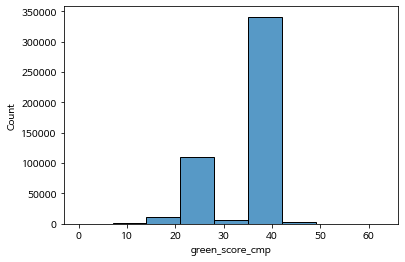

In [ ]:
sns.histplot(df2['green_score_cmp'], binwidth=7)

In [ ]:
import pandas as pd
from pandas import DataFrame
dfs = pd.DataFrame(data = df2.data, columns = df2.feature_names)
dfs 

AttributeError: ignored

In [ ]:
import sklearn.svm as svm
import sklearn.metrics as mt
from sklearn.model_selection import cross_val_score, cross_validate

svm_clf = svm.SVC(kernel = 'linear')

#교차검증
scores = cross_val_score(svm_clf, , y, cv = 5)
scores

pd.DataFrame(cross_validate(svm_clf, X, y,cv =5 ))

print('교차검증평균: ', scores.mean())

SyntaxError: ignored

In [ ]:
data_train = df2
data_train_X = data_train.drop(["green_score", "green_score_cmp"], axis = 1)
data_train_y = data_train["green_score_cmp"]
data_test = df2

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

rf_clf = DecisionTreeClassifier()
labels = preprocessing.LabelEncoder()
y_cat = labels.fit_transform(data_train_y)
X_train, X_test, y_train, y_test = train_test_split(data_train_X, y_cat, test_size = 0.3)

ModuleNotFoundError: ignored

In [ ]:
import sklearn.svm as svm
import sklearn.metrics as mt
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing


In [ ]:
labels = preprocessing.LabelEncoder()
y_cat = labels.fit_transform(data_train_y)
X_train, X_test, y_train, y_test = train_test_split(data_train_X, y_cat, test_size = 0.3)

In [ ]:
svm_clf = svm.SVC(kernel = 'linear')

In [ ]:
rf_clf = DecisionTreeClassifier()
labels = preprocessing.LabelEncoder()
y_cat = labels.fit_transform(data_train_y)
X_train, X_test, y_train, y_test = train_test_split(data_train_X, y_cat, test_size = 0.3)

In [ ]:
#교차검증
scores = cross_val_score(svm_clf, X_train, y_train, cv = 5)
scores

In [ ]:
pd.DataFrame(cross_validate(svm_clf, X_train, y_train, cv = 5))
print('교차검증평균 : ', scores.mean())

In [ ]:
pd.DataFrame(cross_validate(svm_clf, X_test, y_test, cv = 5))
print('교차검증평균 : ', scores.mean())